# Midterm (MACS 30150), February 10, 2020 [20 points total]
### [Put your name here]
You will have an hour and fifty minutes to take this exam.
1. Put your name in the space provided above (without the brackets).
2. Download this notebook and accompanying data `data/hh_inc_synth.txt` and images `images/hist_inc_2.png`.
3. The class will disconnect their wi-fi and begin taking the exam.
4. The exam is open computer, closed internet, open note.
5. Once you are done, you will signal to a TA or instructor to come over and monitor while you reconnect to the internet and upload your edited notebook to Canvas.

Remember that you must clearly indicate your answers to all questions below. We will give partial credit for partially correct answers. The midterm is worth 20 points (2 problem sets).

# 1. Numerical Integration [10 points total]
Assume that the distribution of household income (in U.S. dollars \\$) is characterized by the two-parameter gamma (GA) distribution (similar to the log normal distribution). The following is the probability density function (PDF) of the gamma (GA) distribution, which tells you the probability density of variable $x$ for given values of parameters $\alpha$ and $\beta$.

\begin{equation*}
\begin{split}
&\text{(GA):}\quad f(x;\alpha,\beta) = \frac{1}{\beta^\alpha \Gamma(\alpha)}x^{\alpha-1}e^{-\frac{x}{\beta}}, \quad x>0, \:\alpha,\beta>0 \\
&\quad\quad \text{where}\quad \Gamma(z)\equiv\int_0^\infty t^{z-1}e^{-t}dt
\end{split}
\end{equation*}

Some code for the PDF of the gamma (GA) distribution is the following.

In [6]:
import numpy as np
import scipy.special as spc

def GA_pdf(xvals, alpha, beta):
    '''
    --------------------------------------------------------------------
    Returns the PDF values from the two-parameter gamma (GA)
    distribution. See McDonald and Xu (1995).

    (GA): f(x; alpha, beta) = (1 / ((beta ** alpha) *
        spc.gamma(alpha))) * (x ** (alpha - 1)) * (e ** (-x / beta))
    x in [0, infty), alpha, beta > 0
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N,) vector, values in the support of gamma distribution
    alpha = scalar > 0, gamma distribution parameter
    beta  = scalar > 0, gamma distribution parameter

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        spc.gamma()

    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals = (N,) vector, pdf values from gamma distribution
               corresponding to xvals given parameters alpha and beta

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    pdf_vals = \
        np.float64((1 / ((beta ** alpha) * spc.gamma(alpha))) *
                   (xvals ** (alpha - 1)) * np.exp(-xvals / beta))

    return pdf_vals

As a final suggestion for numerical approximations of integrals that use this `GA_pdf()` function, you can integrate this with a `lambda function` in which the `alpha` and `beta` are hard coded. For parts (b) and (c), one approach might be to define a `lambda` function like the following and use that as your input function for the `quad` command in part (c) or any of your Newton-Cotes methods in part (b).

In [7]:
GApdf = lambda x: GA_pdf(x, alpha_1a, beta_1a)

## 1a) Plot the GA distribution of income [2 points]
Assume that the GA distribution coefficient values are $\alpha=1.23$ and $\beta=54,649.9$. Use Python to plot the GA PDF of income using 1,000 equally spaced income values between `1e-7` and \\$350,000 and using the `GA_pdf()` function above. Make sure your plot has an $x$-axis labeled "income" and a $y$-axis labeled "density".

## 1b) Midpoint, trapezoid, and Simpson's rule [5 points]
Assuming $\alpha=1.23$ and $\beta=54,649.9$ in the gamma (GA) distribution, and using $N=30$ equally spaced bins, approximate the percent of the population with an income less than \\$75,000 using the midpoint rule, trapezoid rule, and Simpson's rule. The analytical expression for this percentage is given by the following integral.

$$ \int_0^{350,000}f(x;\alpha,\beta)dx $$

Report your values for this approximated itegral for the midpoint rule, trapezoid rule, and Simpson's rule, respectively.

## 1c) Use Gaussian quadrature to approximate the integral [3 points]
Use gaussian quadrature using the `scipy.integrate.quad()` command to approximate the percent of the population that earns less than \\$75,000 assuming that the population income is distributed according to the gamma (GA) distribution with parameter values $\alpha=1.23$ and $\beta=54,649.9$. Report your percentage that you calculated using Gaussian quadrature.

# 2. Generalized method of moments estimation [10 points total]
Suppose that your friend at the Bureau of Labor Statistics told you the following four moments (statistics) of the U.S. household income distribution in the third column of the table.

| Income range | Number of households |Percent of population |
| :--- | ---: | :---: |
| Less than \\$10,000 | 9,233 | 7.6\% |
| \\$10,000 to \\$100,000 | 86,431 | 71.4\% |
| \\$100,000 to \\$160,000 | 16,347 | 13.5\% |
| Greater than \\$160,000 | 9,074 | 7.5\% |

Assume that these incomes are generated by the lognormal distribution, specified by the following probability density function (PDF).

\begin{equation*}
\begin{split}
&(LN) \quad f(x|\mu,\sigma) = \frac{1}{x\sigma\sqrt{2\pi}}e^{-\frac{[\ln(x)] - \mu]^2}{2\sigma^2}} \\
&\quad\quad\quad\text{for}\quad x>0, \quad -\infty<\mu<\infty, \quad\text{and}\quad \sigma>0
\end{split}
\end{equation*}

One could plot a histogram of the information in the table above using the following code that imports the original data `hh_inc_synth.txt` from which the histogram was generated. (NOTE that you will not need to use the original data except for plotting fitted distributions over this histogram using the exact code below.)

Text(0, 0.5, 'Density (area sums to 1)')

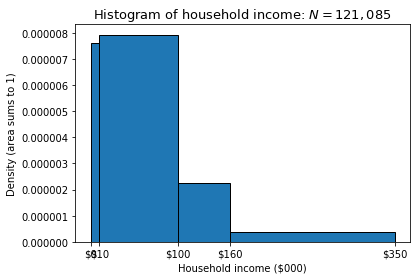

In [9]:
import numpy as np
import matplotlib.pyplot as plt

hh_inc_synth = np.loadtxt('data/hh_inc_synth.txt')

bin_bound_list = [0, 10000, 100000, 160000, 350000]
bin_widths = np.array([10000, 90000, 60000, 190000])
N = len(hh_inc_synth)
weight_inc = np.zeros(N)
in_bin_1 = hh_inc_synth <= 10000
in_bin_2 = (hh_inc_synth > 10000) * (hh_inc_synth <= 100000)
in_bin_3 = (hh_inc_synth > 100000) * (hh_inc_synth <= 160000)
in_bin_4 = hh_inc_synth > 160000
weight_inc[in_bin_1] = 1 / (N * 10000)
weight_inc[in_bin_2] = 1 / (N * 90000)
weight_inc[in_bin_3] = 1 / (N * 60000)
weight_inc[in_bin_4] = 1 / (N * 190000)

n, bin_cuts, patches = \
    plt.hist(hh_inc_synth, bin_bound_list, edgecolor='black',
             weights=weight_inc, label='data histogram')
plt.title(r'Histogram of household income: $N=121,085$',
          fontsize=13)
plt.xticks(np.array([0, 10000, 100000, 160000, 350000]),
           ('$0', '$10', '$100', '$160', '$350'))
plt.xlabel(r'Household income (\$000)')
plt.ylabel(r'Density (area sums to 1)')

Some python code for the PDF of the lognormal distribution is the following.

In [1]:
def LN_pdf(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    This function gives the PDF of the lognormal distribution for xvals
    given mu and sigma

    (LN): f(x; mu, sigma) = (1 / (x * sigma * sqrt(2 * pi))) *
            exp((-1 / 2) * (((log(x) - mu) / sigma) ** 2))
            x in [0, infty), mu in (-infty, infty), sigma > 0
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N,) vector, data
    mu    = scalar, mean of the ln(x)
    sigma = scalar > 0, standard deviation of ln(x)

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals        = (N,) vector, probability of each observation given
                      the parameter values

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    pdf_vals = np.float64(((1 / (np.sqrt(2 * np.pi) * sigma * xvals)) *
                          np.exp((-1.0 / 2.0) *
                          (((np.log(xvals) - mu) / sigma) ** 2))))

    return pdf_vals

The following will help you to calculate your model moments. Using numerical integration of the PDF of the log normal distribution in your GMM minimization problem takes too long. The following method uses the cummulative distribution function (CDF). For a given $\mu$ and $\sigma$ of the log normal distribution, you can calculate the percent of a distribution between a lower bound `LB` and upper bound `UB` of income using the following code.

In [ ]:
import scipy.stats as sts

pct_LBtoUB = (sts.lognorm.cdf(UB, s=sigma, scale=np.exp(mu)) -
              sts.lognorm.cdf(LB, s=sigma, scale=np.exp(mu)))

## 2a) Plot a log normal distribution with the histogram (2 points)
Plot a log normal distribution with mean $\mu=11.5$ and $\sigma=0.9$ using the `LN_pdf()` code for the lognorm PDF above. Plot the log normal distribution over the histogram using the histogram code above. Make sure to use the same `x`-axis and `y`-axis labels as in the histogram plot above. Make sure to put a legend in the upper-right corner.

## 2b) GMM estimation with identity weighting matrix (5 points)
Using the four moments in the table above fit the log normal distribution to the income data using GMM and the identity matix for the optimal weighting matrix. More specifically, estimate $\mu$ and $\sigma$ from the log normal distribution to match the percentage moments in the third column of the table above with the income bin cutoffs listed in the first column of the table above. Report your estimates $\mu_{GMM1}$ and $\sigma_{GMM1}$, criterion function value, data moments, and model moments at your estimated parameter values. Plot your estimated log normal distribution on top of the histogram of the data given in the code above. [**HINT:** Use the log normal CDF approach described above to calculate your model moments. Using numerical integrals will take too long.]

## 2c) GMM estimation with two-step optimal weighting matrix (3 points)
Using the four moments in the table above fit the log normal distribution to the income data using GMM and the two-step optimal weighting matrix. More specifically, estimate $\mu$ and $\sigma$ from the log normal distribution to match the percentage moments in the third column of the table above with the income bin cutoffs listed in the first column of the table above. Report your estimates $\mu_{GMM2}$ and $\sigma_{GMM2}$, criterion function value, data moments, and model moments at your estimated parameter values. Plot your estimated log normal distribution on top of the histogram of the data given in the code above. [**HINT:** Use the log normal CDF approach described above to calculate your model moments. Using numerical integrals will take too long.]